#### Importing the libraries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the preprocessed data

In [4]:
df = pd.read_csv("../data/processed_data.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,3,123.0,4,3,35000,16.02,0.59,1,3,1
1,21,9600,2,5.0,1,1,1000,11.14,0.10,0,2,0
2,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3,1
3,23,65500,3,4.0,3,2,35000,15.23,0.53,0,2,1
4,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4,1


#### Spliting the data into train, validation and test

- Training data = 60% of the data <br>
- Validation data = 20% of the data <br>
- Test data = 20% of the data <br>

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=42)

In [8]:
X_train.shape, X_val.shape, X_test.shape

((19548, 11), (6516, 11), (6517, 11))

#### As the data is imbalanced, we will use undersample the data

In [9]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([15269,  4279]))

In [48]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


#### Training the models

#### Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5, 
    random_state=42
)

In [162]:
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)


Training Decision Tree...


,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Testing the model on the validation set

In [166]:
y_predict_dt = dt_model.predict(X_val)
acc_dt = accuracy_score(y_val, y_predict_dt)
print(f"Decision Tree Accuracy: {acc_dt * 100:.2f}%")

Decision Tree Accuracy: 90.55%


In [165]:
dt_report_dict = classification_report(
    y_val, 
    y_predict_dt, 
    target_names=['No Default', 'Default'],
    output_dict=True  
)
dt_report_df = pd.DataFrame(dt_report_dict).transpose()

print("\n--- Decision Tree Report (Table) ---")
dt_report_df


--- Decision Tree Report (Table) ---


,precision,recall,f1-score,support
No Default,0.924072,0.957225,0.940356,5073.000000
Default,0.827914,0.723493,0.772189,1443.000000
accuracy,0.905463,0.905463,0.905463,0.905463
macro avg,0.875993,0.840359,0.856273,6516.000000
weighted avg,0.902778,0.905463,0.903115,6516.000000


#### Random Forest

In [90]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42,criterion='entropy')

In [91]:
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

Training Random Forest...


,n_estimators,300
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Testing the model on the validation set

In [92]:
y_predict_rf = rf_model.predict(X_val)
acc_rf = accuracy_score(y_val, y_predict_rf)
print(f"Random Forest Accuracy: {acc_rf * 100:.2f}%")

Random Forest Accuracy: 89.06%


In [93]:
rf_report_dict = classification_report(
    y_val, 
    y_predict_rf, 
    target_names=['No Default', 'Default'],
    output_dict=True  
)
rf_report_df = pd.DataFrame(rf_report_dict).transpose()

print("\n--- Random Forest Report (Table) ---")
rf_report_df



--- Random Forest Report (Table) ---


,precision,recall,f1-score,support
No Default,0.940939,0.917012,0.928821,5073.000000
Default,0.732188,0.797644,0.763516,1443.000000
accuracy,0.890577,0.890577,0.890577,0.890577
macro avg,0.836563,0.857328,0.846168,6516.000000
weighted avg,0.894710,0.890577,0.892213,6516.000000


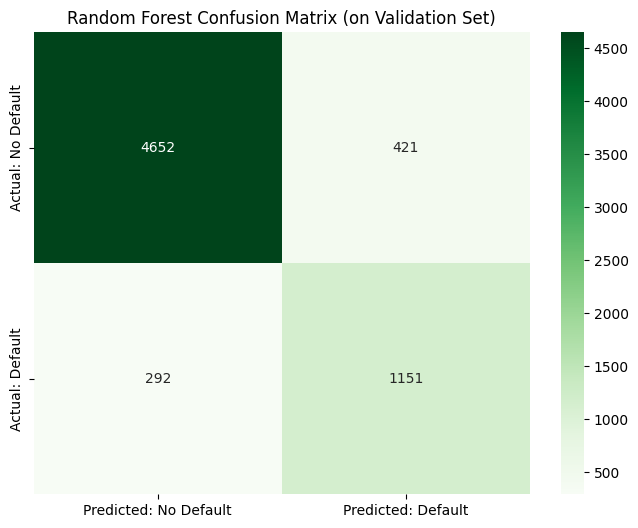

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_predict_rf)

# print("Confusion Matrix:")
# print(cm)

labels = ['Predicted: No Default', 'Predicted: Default']
categories = ['Actual: No Default', 'Actual: Default']
cm_df = pd.DataFrame(cm, index=categories, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')  
plt.title('Random Forest Confusion Matrix (on Validation Set)')
plt.show()

#### Comparing the models

<Figure size 1200x600 with 0 Axes>

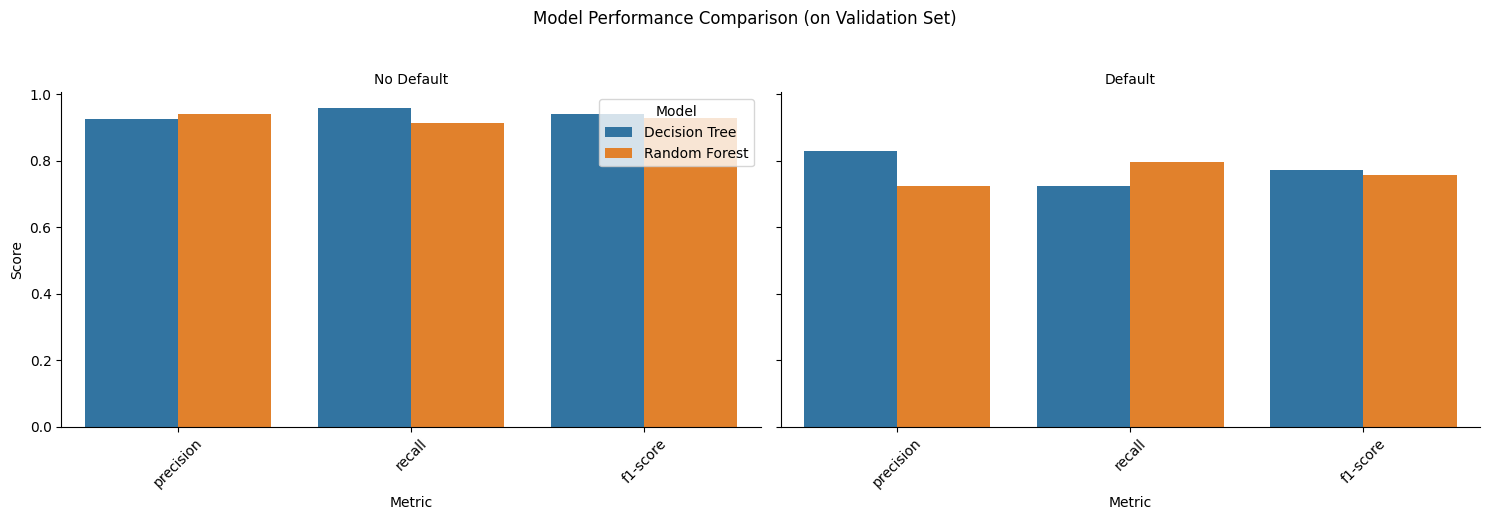

In [ ]:
plt.figure(figsize=(12, 6))
g = sns.catplot(
    data=plot_data_long, 
    x='Metric', 
    y='Score', 
    hue='Model', 
    col='Class', 
    kind='bar',  # Use a bar chart
    legend_out=False,
    aspect=1.5,
)

# Set titles and labels
g.set_axis_labels("Metric", "Score")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle('Model Performance Comparison (on Validation Set)', y=1.03)
plt.tight_layout()

# Show the plot
plt.show()

#### Decision Tree Visualization

A decision tree is a decision support tool that uses a flowchart-like model of decision making, 
allowing one to rapidly make decisions and reach conclusions. It is a tree-like model of decisions and their possible consequences, 
often with internal nodes representing questions and leaf nodes representing outcomes.

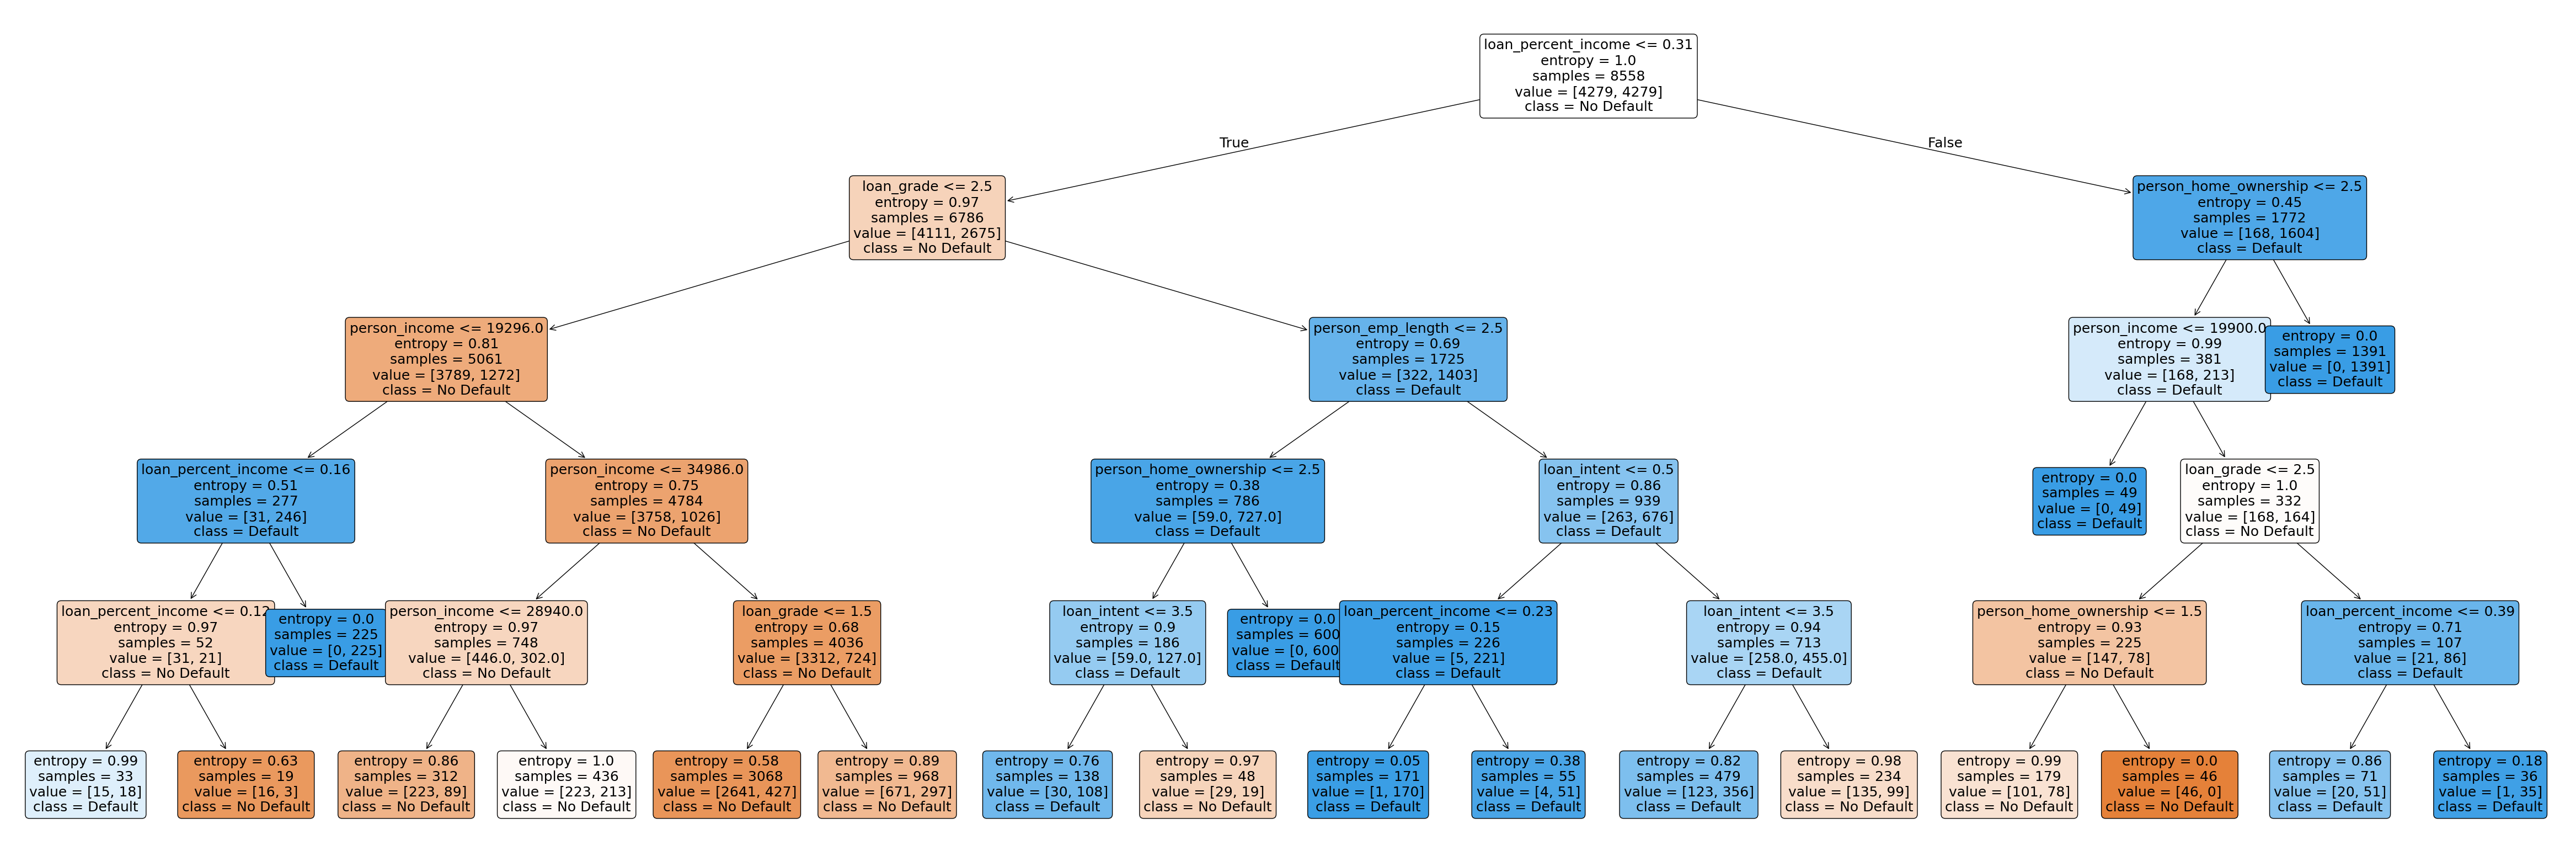

In [189]:

plt.figure(figsize=(60, 20)) 
plot_tree(
    dt_model, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True,      
    rounded=True,     
    precision=2,
    fontsize=18
)
plt.show()

#### Testing the models on the test dataset

In [188]:
print("--- 1. Decision Tree (Final Test) ---")

y_pred_dt_final = dt_model.predict(X_test)
d = classification_report(y_test, y_pred_dt_final, target_names=['No Default', 'Default'],output_dict=True)
pd.DataFrame(d).transpose()


--- 1. Decision Tree (Final Test) ---


,precision,recall,f1-score,support
No Default,0.924806,0.954005,0.939179,5131.000000
Default,0.807190,0.712843,0.757088,1386.000000
accuracy,0.902716,0.902716,0.902716,0.902716
macro avg,0.865998,0.833424,0.848133,6517.000000
weighted avg,0.899792,0.902716,0.900453,6517.000000


In [187]:
cm_dt = confusion_matrix(y_test, y_pred_dt_final)
print("Confusion Matrix:")
d = cm_dt
pd.DataFrame(d).transpose()

Confusion Matrix:


,0,1
0,4895,398
1,236,988


In [186]:
print("\n--- 2. Random Forest (Final Test) ---")

y_pred_rf_final = rf_model.predict(X_test)

d = classification_report(y_test, y_pred_rf_final, target_names=['No Default', 'Default'],output_dict=True)
pd.DataFrame(d).transpose()




--- 2. Random Forest (Final Test) ---


,precision,recall,f1-score,support
No Default,0.940364,0.915806,0.927923,5131.000000
Default,0.715789,0.784993,0.748796,1386.000000
accuracy,0.887985,0.887985,0.887985,0.887985
macro avg,0.828077,0.850399,0.838359,6517.000000
weighted avg,0.892603,0.887985,0.889827,6517.000000


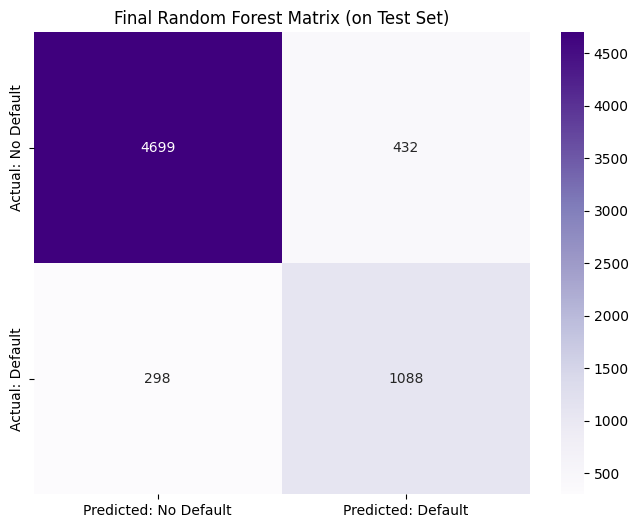

In [185]:

cm_rf = confusion_matrix(y_test, y_pred_rf_final)
labels = ['Predicted: No Default', 'Predicted: Default']
categories = ['Actual: No Default', 'Actual: Default']
cm_rf_df = pd.DataFrame(cm_rf, index=categories, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_df, annot=True, fmt='d', cmap='Purples')
plt.title('Final Random Forest Matrix (on Test Set)')
plt.show()

#### Saving the models

In [184]:
# Savint Decision Tree model
# joblib.dump(dt_model, 'decision_tree_model.joblib')

# Saving the Random Forest model
joblib.dump(rf_model, '../models/random_forest_model.joblib')

['../models/random_forest_model.joblib']